In [1]:
import pandas as pd
import numpy as np
import csv
import re
import time
import tqdm
import zipfile
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import itertools

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

# Scraping
import requests
from bs4 import BeautifulSoup as bs
import os
import lxml
from lxml import objectify
import ftplib
from io import BytesIO

#Text processing
from nltk.stem import SnowballStemmer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfTransformer
from PIL import Image
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jgb569\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
tv2_analysis = pd.read_csv("tv2_analysis.csv")

In [3]:
dr_analysis = pd.read_csv("dr_analysis.csv")

In [6]:
dr_analysis['date'] = pd.to_datetime(dr_analysis['date'])
tv2_analysis['date'] = pd.to_datetime(tv2_analysis['date'])


# Krimi Tag

In [7]:
tv2_krimi_tag = tv2_analysis[tv2_analysis['tag'] == "Krimi"].copy()

In [8]:
# Group by year 
tv2_krimi_tag_grouped =  tv2_krimi_tag.groupby(tv2_krimi_tag["date"].dt.year)["tag"].count()

In [10]:
tv2_krimi_tag_grouped = pd.DataFrame(tv2_krimi_tag_grouped).reset_index()

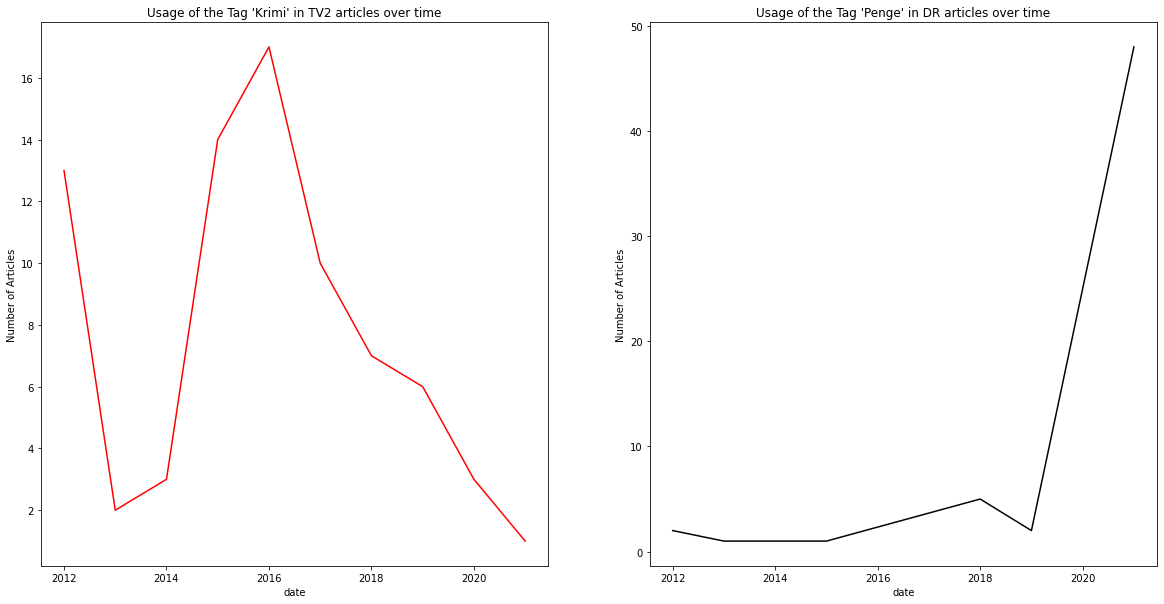

In [27]:
# Create and export plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(20,10))
ax[0] = sns.lineplot(x = 'date', y = 'tag', data = tv2_krimi_tag_grouped, ax = ax[0], color = 'red')\
    .set(title = "Usage of the Tag 'Krimi' in TV2 articles over time", ylabel = "Number of Articles")
ax[1] = sns.lineplot(x = 'date', y = 'tag', data = dr_penge_tag_grouped, ax = ax[1], color = 'black')\
    .set(title = "Usage of the Tag 'Penge' in DR articles over time", ylabel = "Number of Articles")
plt.savefig("TV2_krimi_tag.pdf", dpi = 300)

In [13]:
# Subset DataFrame
dr_penge_tag = dr_analysis[dr_analysis['tag'] == "Penge"]

In [15]:
# Group by year 
dr_penge_tag_grouped =  dr_penge_tag.groupby(dr_penge_tag["date"].dt.year)["tag"].count()

In [16]:
dr_penge_tag_grouped = pd.DataFrame(dr_penge_tag_grouped).reset_index()

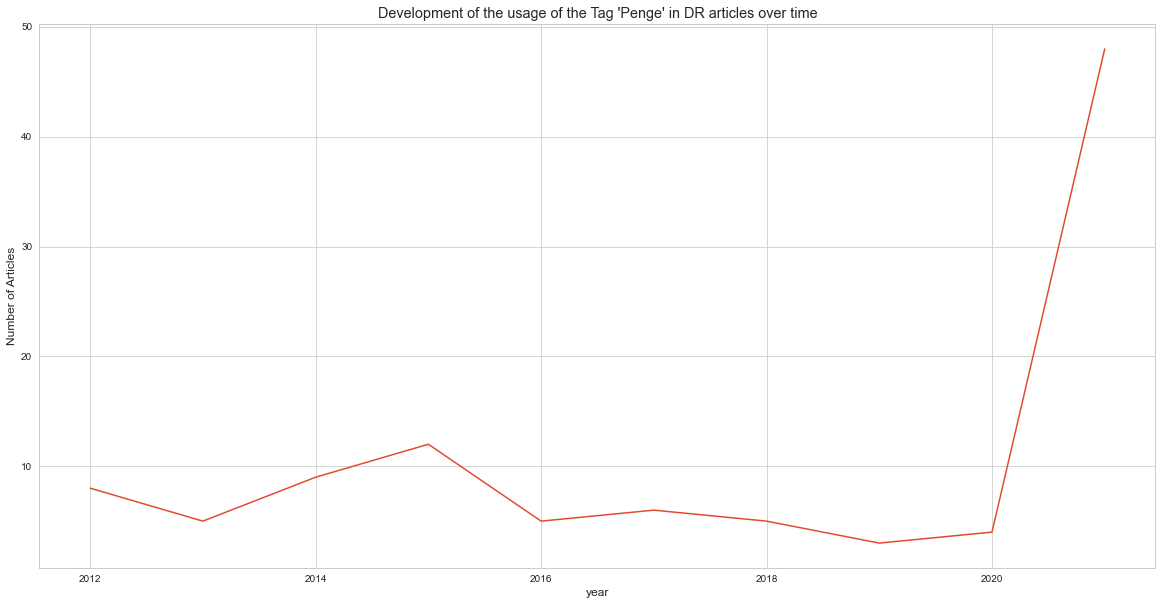

In [116]:
# Create and export plot
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(20,10))
ax = sns.lineplot(x = 'year', y = 'tag', data = dr_penge_tag_grouped)\
    .set(title = "Development of the usage of the Tag 'Penge' in DR articles over time", ylabel = "Number of Articles")
plt.savefig("Penge_tag.jpg", dpi = 1200)